In [1]:
# conda activate base
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model



In [2]:
data = pd.read_csv('./data/Iris.csv')
data

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
data['species'] = data['species'].replace(
    {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})

In [5]:
data

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']], data['species'], test_size=0.3)

In [7]:
x_train

,SepalLength,SepalWidth,PetalLength,PetalWidth
70,5.9,3.2,4.8,1.8
1,4.9,3.0,1.4,0.2
127,6.1,3.0,4.9,1.8
44,5.1,3.8,1.9,0.4
60,5.0,2.0,3.5,1.0
...,...,...,...,...
4,5.0,3.6,1.4,0.2
126,6.2,2.8,4.8,1.8
67,5.8,2.7,4.1,1.0
35,5.0,3.2,1.2,0.2


In [8]:
y_train

70     2
1      1
127    3
44     1
60     2
      ..
4      1
126    3
67     2
35     1
65     2
Name: species, Length: 105, dtype: int64

In [9]:
model = linear_model.LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=120, verbose=True)
model.fit(x_train, y_train)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15354D+02    |proj g|=  7.14333D+01

At iterate   50    f=  2.10340D+01    |proj g|=  3.84471D-01

At iterate  100    f=  2.05483D+01    |proj g|=  1.23749D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15    106    122      1     0     0   9.560D-04   2.055D+01
  F =   20.548324572086859     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=120, multi_class='multinomial', verbose=True)

In [10]:
model.predict(x_test)

array([2, 3, 1, 3, 3, 1, 3, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 3,
       1, 2, 3, 2, 2, 3, 3, 3, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 3,
       1])

In [11]:
x_test

,SepalLength,SepalWidth,PetalLength,PetalWidth
50,7.0,3.2,4.7,1.4
109,7.2,3.6,6.1,2.5
9,4.9,3.1,1.5,0.1
129,7.2,3.0,5.8,1.6
146,6.3,2.5,5.0,1.9
34,4.9,3.1,1.5,0.1
120,6.9,3.2,5.7,2.3
135,7.7,3.0,6.1,2.3
92,5.8,2.6,4.0,1.2
78,6.0,2.9,4.5,1.5


In [12]:
# accuracy
model.score(x_test, y_test)

0.9333333333333333

In [13]:
predicted_output = model.predict(x_test)
predicted_output

array([2, 3, 1, 3, 3, 1, 3, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 3,
       1, 2, 3, 2, 2, 3, 3, 3, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 3,
       1])

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[11,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 15]])

Text(33.22222222222222, 0.5, 'Truth or Actual Value')

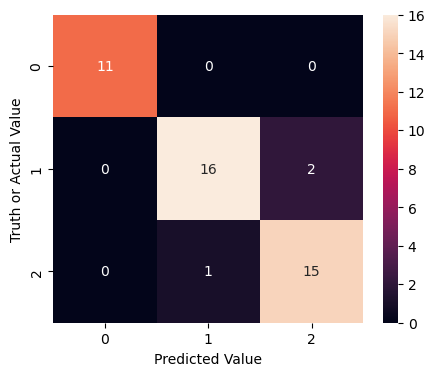

In [15]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')